In [27]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [12]:
survey = pd.read_csv("masculinity.csv")

In [13]:
mapping_dictionary = {"Often" : 4, "Sometimes" : 3, "Rarely" : 2, "Never, but open to it" : 1, "Never, and not open to it" : 0.}
for num in range(1,12):
    if num < 10: survey["q0007_000" + str(num)] = survey["q0007_000" + str(num)].map(mapping_dictionary)
    else: survey["q0007_00" + str(num)] = survey["q0007_00" + str(num)].map(mapping_dictionary)
    

In [68]:
survey.columns

Index(['Unnamed: 0', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
      

In [73]:
survey.racethn4.value_counts()

White       1014
Other         92
Hispanic      41
Black         41
W              1
Name: racethn4, dtype: int64

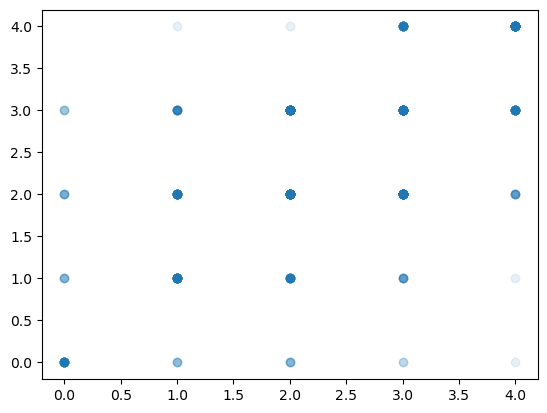

In [19]:
plt.scatter(survey["q0007_0001"], survey["q0007_0002"], alpha = 0.1)
plt.show()

In [48]:
column_list = []
for num in range(1,12):
    if num < 10: column_list += ["q0007_000" + str(num)]
    else: column_list += ["q0007_00" + str(num)]
    
rows_to_cluster = survey.dropna(subset = column_list)

In [57]:
rows_to_cluster.columns

Index(['Unnamed: 0', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
      

In [52]:
model = KMeans(n_clusters = 2)
model.fit(rows_to_cluster[column_list])

KMeans(n_clusters=2)

In [53]:
print(model.cluster_centers_)

[[1.90813648 1.8503937  0.96062992 1.66929134 0.53805774 2.88188976
  0.0839895  2.80577428 2.17847769 0.61154856 1.66929134]
 [2.85669782 2.8364486  2.8411215  2.43925234 0.71806854 2.74454829
  0.52492212 2.97196262 2.80373832 1.53582555 2.39252336]]


In [54]:
cluster_zero_indices, cluster_one_indices = [[],[]]
for row in range(len(model.labels_)):
    if model.labels_[row] == 0:
        cluster_zero_indices += [row]
    else: cluster_one_indices += [row]


In [55]:
cluster_zero_df = rows_to_cluster.iloc[cluster_zero_indices]
cluster_one_df = rows_to_cluster.iloc[cluster_one_indices]

In [78]:
print("More toxic masculinity")
print(cluster_zero_df.educ4.value_counts()*100/len(cluster_zero_df))
print("\n")
print("Less toxic masculinity")
print(cluster_one_df.educ4.value_counts()*100/len(cluster_one_df))

More toxic masculinity
College or more         32.020997
Some college            29.396325
Post graduate degree    25.721785
High school or less     12.598425
Name: educ4, dtype: float64


Less toxic masculinity
Post graduate degree    36.915888
College or more         31.308411
Some college            23.676012
High school or less      8.099688
Name: educ4, dtype: float64


In [79]:
print("More toxic masculinity")
print(cluster_zero_df.age3.value_counts()*100/len(cluster_zero_df))
print("\n")
print("Less toxic masculinity")
print(cluster_one_df.age3.value_counts()*100/len(cluster_one_df))

More toxic masculinity
65 and up    53.805774
35 - 64      40.419948
18 - 34       5.511811
Name: age3, dtype: float64


Less toxic masculinity
35 - 64      50.311526
65 and up    42.367601
18 - 34       7.320872
Name: age3, dtype: float64


In [80]:
print("More toxic masculinity")
print(cluster_zero_df.race2.value_counts()*100/len(cluster_zero_df))
print("\n")
print("Less toxic masculinity")
print(cluster_one_df.race2.value_counts()*100/len(cluster_one_df))

More toxic masculinity
White        85.301837
Non-white    14.698163
Name: race2, dtype: float64


Less toxic masculinity
White        84.890966
Non-white    15.109034
Name: race2, dtype: float64


In [82]:
print("More toxic masculinity")
print(cluster_zero_df.kids.value_counts()*100/len(cluster_zero_df))
print("\n")
print("Less toxic masculinity")
print(cluster_one_df.kids.value_counts()*100/len(cluster_one_df))

More toxic masculinity
Has children    70.341207
No children     29.133858
Name: kids, dtype: float64


Less toxic masculinity
Has children    66.666667
No children     33.021807
Name: kids, dtype: float64


In [83]:
print("More toxic masculinity")
print(cluster_zero_df.orientation.value_counts()*100/len(cluster_zero_df))
print("\n")
print("Less toxic masculinity")
print(cluster_one_df.orientation.value_counts()*100/len(cluster_one_df))

More toxic masculinity
Straight        94.488189
Gay/Bisexual     3.937008
Other            0.787402
No answer        0.524934
Name: orientation, dtype: float64


Less toxic masculinity
Straight        82.242991
Gay/Bisexual    15.109034
Other            2.492212
No answer        0.155763
Name: orientation, dtype: float64
